<a href="https://colab.research.google.com/github/khairul746/Test_WWWaste/blob/main/test_wwwaste_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv('2003_2017_waste.csv')
df.head()

,waste_type,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
0,Food,679900,111100.0,791000,0.14,2016
1,Paper/Cardboard,576000,607100.0,1183100,0.51,2016
2,Plastics,762700,59500.0,822200,0.07,2016
3,C&D,9700,1585700.0,1595400,0.99,2016
4,Horticultural waste,111500,209000.0,320500,0.65,2016


In [3]:
df.columns

Index(['waste_type', 'waste_disposed_of_tonne', 'total_waste_recycled_tonne',
       'total_waste_generated_tonne', 'recycling_rate', 'year'],
      dtype='object')

In [4]:
df['waste_type'].unique()

array(['Food', 'Paper/Cardboard', 'Plastics', 'C&D',
       'Horticultural waste', 'Wood', 'Ferrous metal',
       'Non-ferrous metal', 'Used slag', 'Ash & Sludge', 'Glass',
       'Textile/Leather', 'Scrap tyres',
       'Others (stones, ceramics & rubber etc.)', 'Total',
       'Others (stones, ceramics & rubber etc)', 'Food waste',
       'Construction Debris', 'Wood/Timber', 'Horticultural Waste',
       'Ferrous Metal', 'Non-ferrous Metals', 'Used Slag', 'Sludge',
       'Scrap Tyres', 'Ferrous Metals', 'Others', 'Construction debris',
       'Non-ferrous metals', 'Ash and sludge', 'Plastic',
       'Others (stones, ceramic, rubber, etc.)'], dtype=object)

# Task 1 : Data Cleaning and Preparation

Standardize waste type names:

1. Normalize the waste_type column (e.g., "Food waste" and "Food" should be the same).
2. Remove 'Total' rows: Exclude rows where waste_type is 'Total' or similar.

In [9]:
def normalize_waste(row):
  waste_type = row.lower()
  if waste_type.startswith('food'):
    return 'food'
  elif waste_type.startswith('plastic'):
    return 'plastic'
  elif waste_type.startswith('paper'):
    return 'paper'
  elif waste_type.startswith('glass'):
    return 'glass'
  elif waste_type.startswith('construction') or waste_type == 'c&d':
    return 'construction'
  elif waste_type.startswith('other'):
    return 'other'
  elif waste_type.startswith('ash'):
    return 'ash'
  elif waste_type.startswith('horticultural'):
    return 'horticultural'
  elif waste_type.startswith('wood'):
    return 'wood'
  elif waste_type.startswith('ferrous'):
    return 'ferrous metal'
  elif waste_type.startswith('non'):
    return 'non ferrous metal'
  elif waste_type.startswith('used'):
    return 'slag'
  elif waste_type.startswith('ash') or waste_type == 'sludge':
    return 'ash and sludge'
  elif waste_type.startswith('total'):
    return None
  else:
    return waste_type



In [18]:
uncleaned_waste_types = df['waste_type'].unique()
uncleaned_waste_types

array(['Food', 'Paper/Cardboard', 'Plastics', 'C&D',
       'Horticultural waste', 'Wood', 'Ferrous metal',
       'Non-ferrous metal', 'Used slag', 'Ash & Sludge', 'Glass',
       'Textile/Leather', 'Scrap tyres',
       'Others (stones, ceramics & rubber etc.)',
       'Others (stones, ceramics & rubber etc)', 'Food waste',
       'Construction Debris', 'Wood/Timber', 'Horticultural Waste',
       'Ferrous Metal', 'Non-ferrous Metals', 'Used Slag', 'Sludge',
       'Scrap Tyres', 'Ferrous Metals', 'Others', 'Construction debris',
       'Non-ferrous metals', 'Ash and sludge', 'Plastic',
       'Others (stones, ceramic, rubber, etc.)'], dtype=object)

In [19]:
cleaned_waste_types = ['Food', 'Paper/Cardboard', 'Plastic', 'Construction',
       'Horticultural', 'Wood/Timber', 'Ferrous metal',
       'Non-ferrous metal', 'Used slag', 'Ash and sludge', 'Glass',
       'Textile/Leather', 'Scrap tyres',
       'Others',
       'Others', 'Food',
       'Construction', 'Wood/Timber', 'Horticultural',
       'Ferrous metal', 'Non-ferrous Metals', 'Used slag', 'Ash and sludge',
       'Scrap Tyres', 'Ferrous metal', 'Others', 'Construction',
       'Non-ferrous metal', 'Ash and sludge', 'Plastic',
       'Others']

In [20]:
df['cleaned_waste_type_replace'] = df['waste_type'].replace(uncleaned_waste_types, cleaned_waste_types)
df['cleaned_waste_type_replace'].unique()

array(['Food', 'Paper/Cardboard', 'Plastic', 'Construction',
       'Horticultural', 'Wood/Timber', 'Ferrous metal',
       'Non-ferrous metal', 'Used slag', 'Ash and sludge', 'Glass',
       'Textile/Leather', 'Scrap tyres', 'Others', 'Non-ferrous Metals',
       'Scrap Tyres'], dtype=object)

In [10]:
df['cleaned_waste_type'] = df['waste_type'].apply(normalize_waste)
df['cleaned_waste_type'].unique()

array(['food', 'paper', 'plastic', 'construction', 'horticultural',
       'wood', 'ferrous metal', 'non ferrous metal', 'slag', 'ash',
       'glass', 'textile/leather', 'scrap tyres', 'other', None,
       'ash and sludge'], dtype=object)

In [11]:
df.isna().sum()

,0
waste_type,0
waste_disposed_of_tonne,0
total_waste_recycled_tonne,0
total_waste_generated_tonne,0
recycling_rate,0
year,0
cleaned_waste_type,15


In [12]:
df.dropna(inplace=True)

# Task 2: Trend Analysis

### 2.1 Annual Waste Generation

In [13]:
df[['total_waste_generated_tonne','year']].groupby('year').sum()

,total_waste_generated_tonne
year,
2003,4728200
2004,4789700
2005,5018200
2006,5220500
2007,5600800
2008,5970200
2009,6114100
2010,6517000
2011,6898300


### 2.2 Top 3 Waste Types by Generation (2017)

In [14]:
waste2017 = df[df['year'] == 2017]
waste2017 = waste2017[['waste_type', 'total_waste_generated_tonne']].groupby('waste_type').sum().reset_index()
waste2017.sort_values(by='total_waste_generated_tonne', ascending=False)[:3]

,waste_type,total_waste_generated_tonne
1,Construction debris,1609300
2,Ferrous metal,1378800
8,Paper/Cardboard,1144800


# Task 3: Recycling Performance

### 3.1 Average Recycling Rate by Waste Type (2003–2017):

In [15]:
df_2003_2017 = df.query('year >= 2003 and year <= 2017')
avg_recycling = df_2003_2017[['waste_type', 'recycling_rate']].groupby('waste_type').mean()
avg_recycling.sort_values(by='recycling_rate', ascending=False)

,recycling_rate
waste_type,
Construction debris,0.990000
C&D,0.990000
Used slag,0.987500
Ferrous metal,0.982500
Non-ferrous metals,0.980000
Construction Debris,0.971818
Used Slag,0.949091
Ferrous Metal,0.941429
Ferrous Metals,0.915000


Best recycled waste type: C&D \
Worst recycled waste type: Others

# Task 4: Visualization (Bonus)

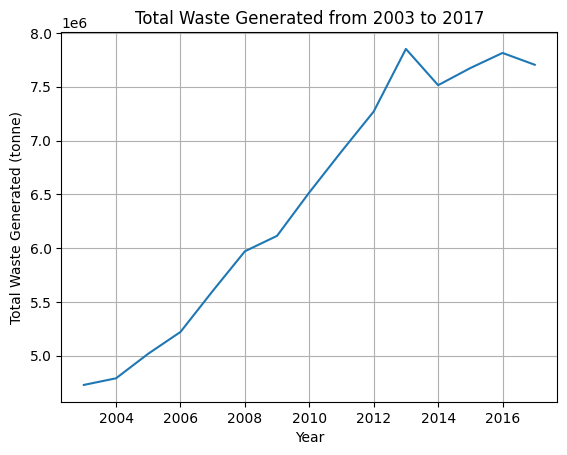

In [16]:
df_2003_2017.groupby('year').sum()['total_waste_generated_tonne'].plot()
plt.xlabel('Year')
plt.ylabel('Total Waste Generated (tonne)')
plt.title('Total Waste Generated from 2003 to 2017')
plt.grid()
plt.show()

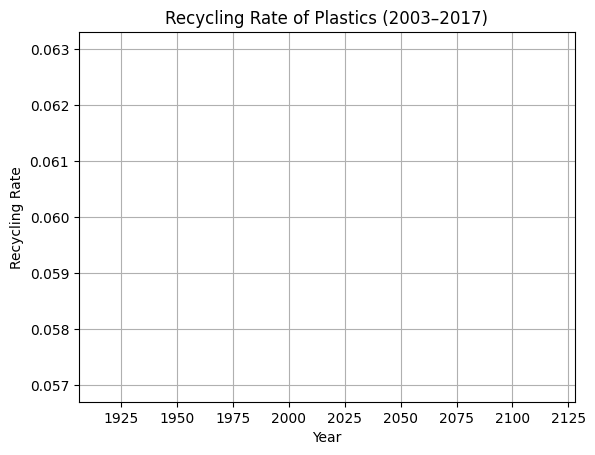

In [17]:
plastics_waste = df_2003_2017[df_2003_2017['waste_type'] == 'Plastic']
plastics_waste = plastics_waste[['year', 'recycling_rate']].groupby('year').mean().reset_index()
plt.plot(plastics_waste['year'], plastics_waste['recycling_rate'])
plt.xlabel('Year')
plt.ylabel('Recycling Rate')
plt.grid()
plt.title('Recycling Rate of Plastics (2003–2017)')
plt.show()